Let's install and import some required libraries before we begin.

In [1]:
#restart the kernel after installation
!pip install pandas-profiling numpy matplotlib seaborn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.7 MB/s eta 0:00:00


In [2]:
!pip install opendatasets scikit-learn jovian --quiet --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import jovian
import os
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Load the dataset

In [4]:
raw_df = pd.read_csv('Crop_Dataset.csv')

In [5]:
raw_df

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175,1712.196283,5.317804,wheat,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184,1748.595734,5.427834,wheat,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159,1893.744627,5.579595,wheat,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149,2123.482908,5.496611,wheat,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162,1642.720357,5.574878,wheat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,173,1778.191164,5.186125,tomatoes,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,141,1552.805515,4.859228,tomatoes,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,181,1622.263022,5.160909,tomatoes,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,183,1369.512711,4.853399,tomatoes,21


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   N                     2200 non-null   int64  
 1   P                     2200 non-null   int64  
 2   K                     2200 non-null   int64  
 3   temperature           2200 non-null   float64
 4   humidity              2200 non-null   float64
 5   ph                    2200 non-null   float64
 6   rainfall              2200 non-null   float64
 7   Total_Nutrients       2200 non-null   int64  
 8   Temperature_Humidity  2200 non-null   float64
 9   Log_Rainfall          2200 non-null   float64
 10  Label                 2200 non-null   object 
 11  Label_Encoded         2200 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 206.4+ KB


In [120]:
raw_df.shape

(2200, 12)

#### We can see there are no null data etries in the provided dataset

### Training, Validation and Test Sets

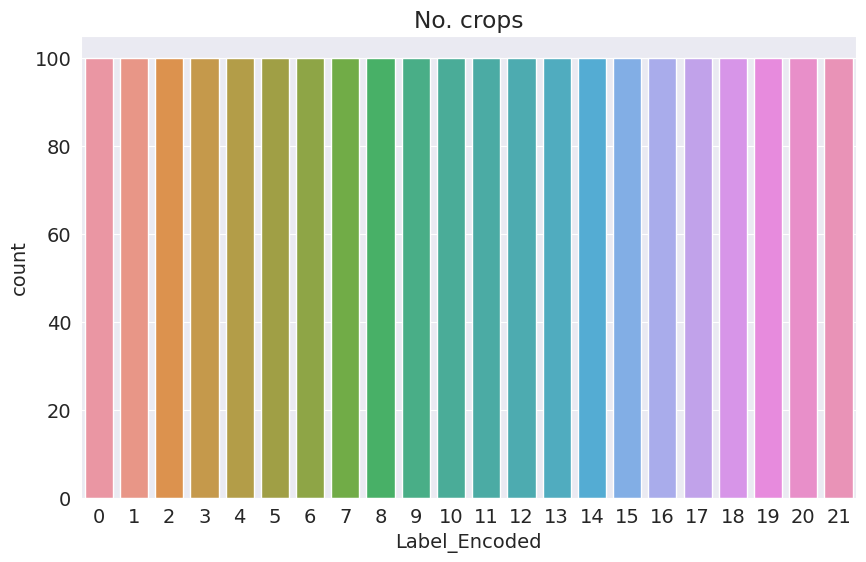

In [9]:
plt.title('No. crops')
sns.countplot(x=raw_df.Label_Encoded);

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

In [12]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (1320, 12)
val_df.shape : (440, 12)
test_df.shape : (440, 12)


### Input and Target Columns

Let's identify the input and target columns.

In [14]:
input_cols = list(train_df.columns)[0:10]
input_cols

['N',
 'P',
 'K',
 'temperature',
 'humidity',
 'ph',
 'rainfall',
 'Total_Nutrients',
 'Temperature_Humidity',
 'Log_Rainfall']

In [15]:
input_cols = list(train_df.columns)[0:10]
target_col = 'Label_Encoded'

In [16]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [17]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [18]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [19]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

### Imputing missing numeric values

In [22]:
from sklearn.impute import SimpleImputer

In [23]:
imputer = SimpleImputer(strategy = 'mean').fit(raw_df[numeric_cols])

In [24]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [25]:
test_inputs[numeric_cols].isna().sum()

N                       0
P                       0
K                       0
temperature             0
humidity                0
ph                      0
rainfall                0
Total_Nutrients         0
Temperature_Humidity    0
Log_Rainfall            0
dtype: int64

### Scaling Numeric Features

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [28]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [29]:
val_inputs.describe().loc[['min', 'max']]

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall
min,0.000000,0.0,0.0,0.029428,0.001943,0.162000,0.001617,0.008152,0.000000,0.007929
max,0.992857,1.0,1.0,0.978714,0.999850,0.834333,0.989399,1.000000,0.958528,0.996261


#### Here we do not use caegorical columns as input to our model hence we do not need to encode categorical cols

### Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

In [121]:
test_inputs

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall
1451,0.721429,0.085714,0.210,0.593069,0.938733,0.416821,0.021904,0.402174,0.665617,0.095421
1334,0.700000,0.021429,0.230,0.497956,0.842992,0.428373,0.104973,0.380435,0.527373,0.327090
1761,0.421429,0.407143,0.220,0.990962,0.922659,0.534458,0.339742,0.415761,0.993368,0.640968
1735,0.314286,0.392857,0.250,0.730414,0.890039,0.516399,0.281407,0.385870,0.746736,0.583897
1576,0.214286,0.942857,0.975,0.404267,0.891779,0.326369,0.353489,0.951087,0.478578,0.653248
...,...,...,...,...,...,...,...,...,...,...
59,0.707143,0.357143,0.150,0.370107,0.769692,0.466063,0.926001,0.467391,0.390921,0.973095
71,0.478571,0.285714,0.165,0.398918,0.792226,0.590274,0.864657,0.361413,0.423457,0.949241
1908,0.864286,0.300000,0.055,0.424105,0.758689,0.656029,0.187846,0.453804,0.424570,0.469346
1958,0.828571,0.335714,0.070,0.405084,0.712913,0.405853,0.168382,0.461957,0.387297,0.440427


> **EXERCISE**: Try a different [encoding strategy](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) and observe how it affects the results.

As a final step, let's drop the textual categorical columns, so that we're left with just numeric data.

In [33]:
X_train = train_inputs[numeric_cols]
X_val = val_inputs[numeric_cols]
X_test = test_inputs[numeric_cols]

In [34]:
X_test

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall
1451,0.721429,0.085714,0.210,0.593069,0.938733,0.416821,0.021904,0.402174,0.665617,0.095421
1334,0.700000,0.021429,0.230,0.497956,0.842992,0.428373,0.104973,0.380435,0.527373,0.327090
1761,0.421429,0.407143,0.220,0.990962,0.922659,0.534458,0.339742,0.415761,0.993368,0.640968
1735,0.314286,0.392857,0.250,0.730414,0.890039,0.516399,0.281407,0.385870,0.746736,0.583897
1576,0.214286,0.942857,0.975,0.404267,0.891779,0.326369,0.353489,0.951087,0.478578,0.653248
...,...,...,...,...,...,...,...,...,...,...
59,0.707143,0.357143,0.150,0.370107,0.769692,0.466063,0.926001,0.467391,0.390921,0.973095
71,0.478571,0.285714,0.165,0.398918,0.792226,0.590274,0.864657,0.361413,0.423457,0.949241
1908,0.864286,0.300000,0.055,0.424105,0.758689,0.656029,0.187846,0.453804,0.424570,0.469346
1958,0.828571,0.335714,0.070,0.405084,0.712913,0.405853,0.168382,0.461957,0.387297,0.440427


Let's save our work before continuing.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/aakashns/sklearn-decision-trees-random-forests


'https://jovian.ai/aakashns/sklearn-decision-trees-random-forests'

### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
model = DecisionTreeClassifier(random_state=42)

In [124]:
%%time
model.fit(X_train, train_targets)

CPU times: user 19.4 ms, sys: 0 ns, total: 19.4 ms
Wall time: 19.4 ms


DecisionTreeClassifier(random_state=42)

An optimal decision tree has now been created using the training data.

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [126]:
train_preds = model.predict(X_train)

In [127]:
train_preds

array([ 9,  3,  5, ..., 19,  4, 16])

In [128]:
pd.value_counts(train_preds)

8     66
16    66
9     64
13    63
19    63
12    63
11    62
14    62
5     61
10    61
0     61
17    60
15    60
7     59
21    59
3     58
2     58
6     57
18    56
4     56
1     55
20    50
Name: count, dtype: int64

The decision tree also returns probabilities for each prediction.

In [129]:
train_probs = model.predict_proba(X_train)

In [130]:
train_probs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Seems like the decision tree is quite confident about its predictions.

Let's check the accuracy of its predictions.

In [131]:
accuracy_score(train_targets, train_preds)

1.0

The training set accuracy is close to 100%! But we can't rely solely on the training set accuracy, we must evaluate the model on the validation set too.

We can make predictions and compute accuracy in one step using `model.score`

In [132]:
model.score(X_val, val_targets)

0.975

### Visualization

We can visualize the decision tree _learned_ from the training data.

In [48]:
from sklearn.tree import plot_tree, export_text

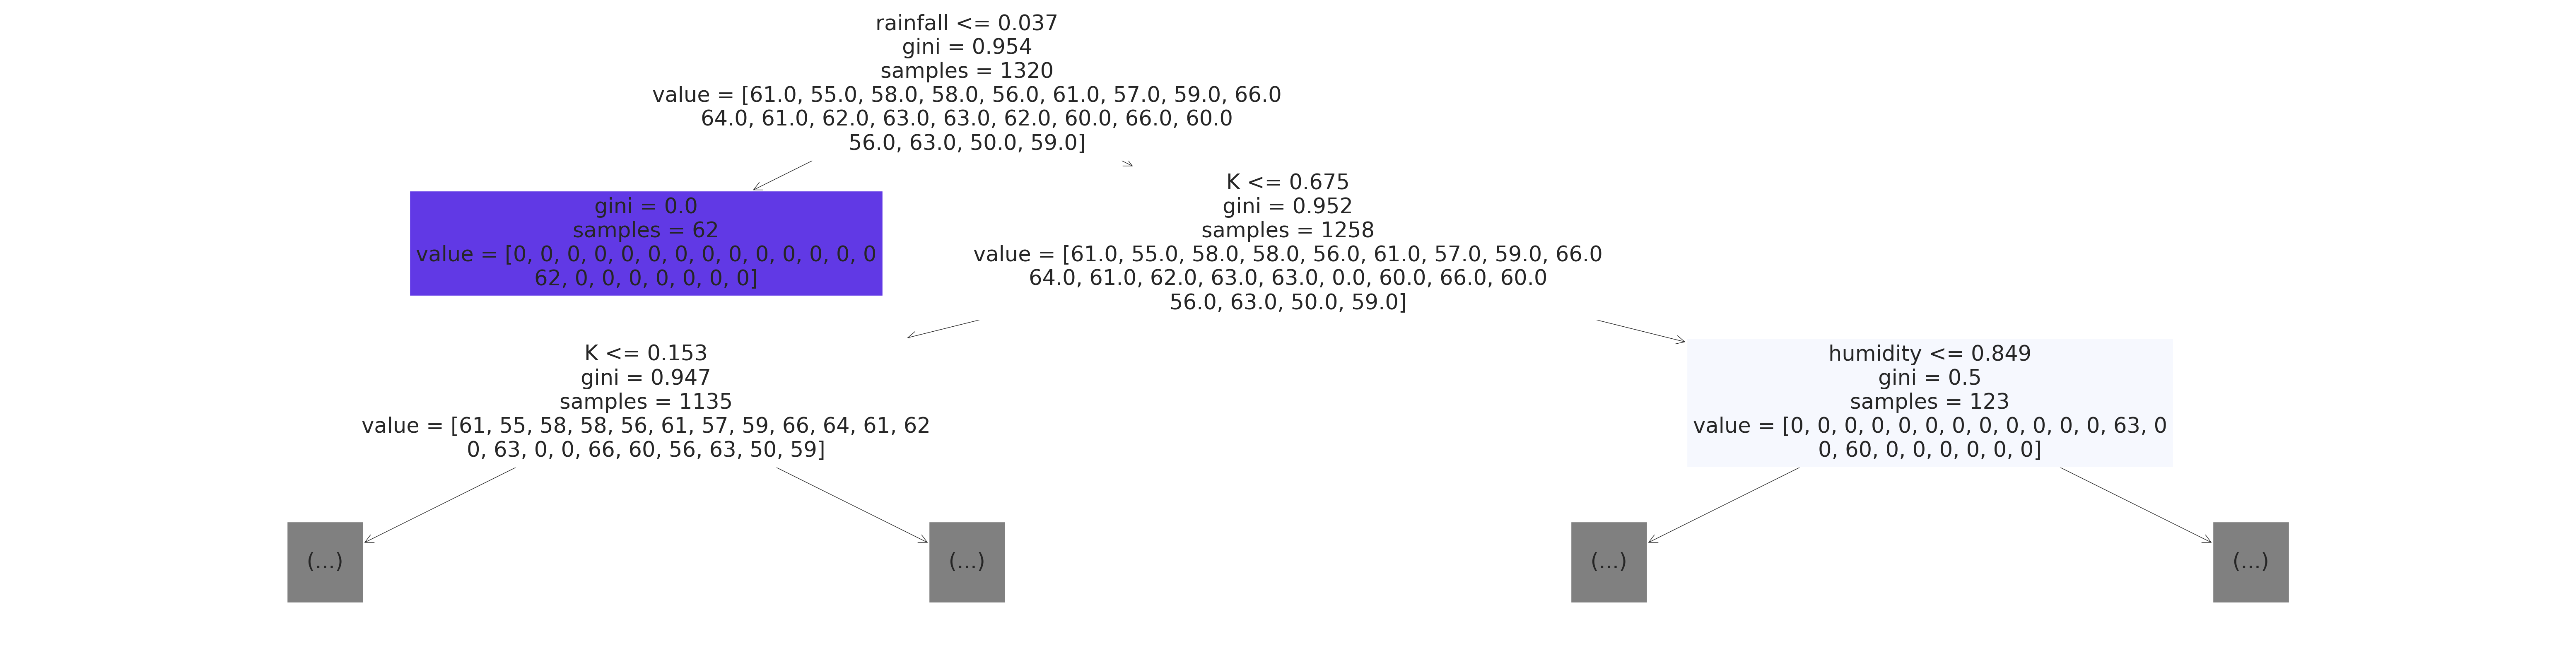

In [49]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

In [133]:
model.tree_.max_depth

14

In [51]:
tree_text = export_text(model, max_depth=10, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- rainfall <= 0.04
|   |--- class: 14
|--- rainfall >  0.04
|   |--- K <= 0.67
|   |   |--- K <= 0.15
|   |   |   |--- humidity <= 0.88
|   |   |   |   |--- humidity <= 0.71
|   |   |   |   |   |--- humidity <= 0.16
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- humidity >  0.16
|   |   |   |   |   |   |--- N <= 0.42
|   |   |   |   |   |   |   |--- rainfall <= 0.22
|   |   |   |   |   |   |   |   |--- humidity <= 0.53
|   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |--- humidity >  0.53
|   |   |   |   |   |   |   |   |   |--- rainfall <= 0.13
|   |   |   |   |   |   |   |   |   |   |--- P <= 0.34
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |   |--- P >  0.34
|   |   |   |   |   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |   |   |   |   |--- rainfall >  0.13
|   |   |   |   |   |   |   |   |   |   |--- P <= 0.35
|   |   |   |   |   |   |   |   |   |   |   |--- class: 5

### Feature Importance

Based on the gini index computations, a decision tree assigns an "importance" value to each feature. These values can be used to interpret the results given by a decision tree.

In [52]:
model.feature_importances_

array([0.09117365, 0.11534503, 0.09534334, 0.00397017, 0.27452705,
       0.00699795, 0.26818497, 0.04957215, 0.04733985, 0.04754583])

Let's turn this into a dataframe and visualize the most important features.

In [53]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [54]:
importance_df.head(10)

,feature,importance
4,humidity,0.274527
6,rainfall,0.268185
1,P,0.115345
2,K,0.095343
0,N,0.091174
7,Total_Nutrients,0.049572
9,Log_Rainfall,0.047546
8,Temperature_Humidity,0.047340
5,ph,0.006998
3,temperature,0.003970


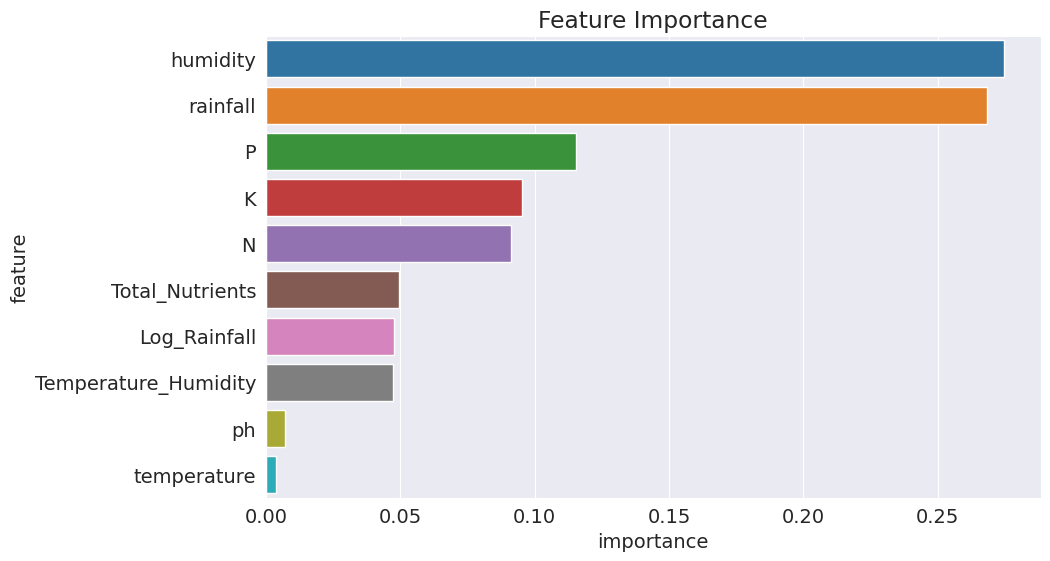

In [55]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

## Hyperparameter tuning

These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are _learned_ from the data. We'll explore a couple of hyperparameters:

- `max_depth`
- `max_leaf_nodes`

### `max_depth`

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization

In [138]:
model = DecisionTreeClassifier(max_depth=4, random_state=42)

In [139]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=4, random_state=42)

We can compute the accuracy of the model on the training and validation sets using `model.score`

In [140]:
model.score(X_train, train_targets)

0.33484848484848484

In [141]:
model.score(X_val, val_targets)

0.30454545454545456

Let's plug another value for max_depth because the current value reduce the accuray

In [143]:
model = DecisionTreeClassifier(max_depth=14, random_state=42)
model.fit(X_train, train_targets)
model.score(X_train, train_targets)
model.score(X_val, val_targets)

0.975

In [144]:
model.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

Let's experiment with different depths using a helper function.

In [74]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [75]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 379 ms, sys: 0 ns, total: 379 ms
Wall time: 378 ms


In [76]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.903030,0.900000
1,2,0.855303,0.847727
2,3,0.762121,0.768182
3,4,0.665152,0.695455
4,5,0.528788,0.570455
5,6,0.396212,0.427273
6,7,0.306061,0.336364
7,8,0.170455,0.186364
8,9,0.059848,0.090909
9,10,0.012879,0.036364


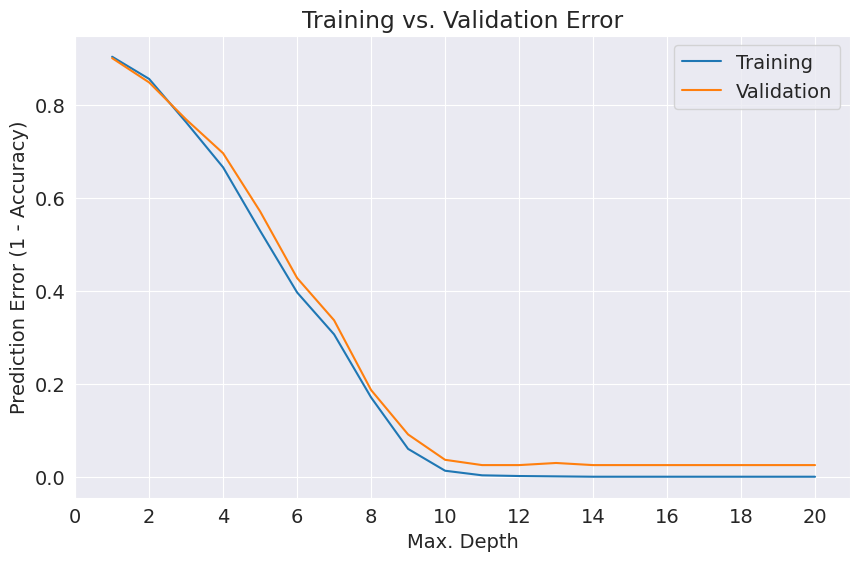

In [77]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

You'll often need to tune hyperparameters carefully to find the optimal fit. In the above case, it appears that a maximum depth of 14 results in the lowest validation error.

In [146]:
model = DecisionTreeClassifier(max_depth=14, random_state=42).fit(X_train, train_targets)
model.score(X_val, val_targets)

0.975

### `max_leaf_nodes`

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes. This allows branches of the tree to have varying depths.

In [78]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [79]:
model.fit(X_train, train_targets)

DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [80]:
model.score(X_train, train_targets)

1.0

In [81]:
model.score(X_val, val_targets)

0.9727272727272728

In [147]:
model.tree_.max_depth

14

In [83]:
def max_leaf_node_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [84]:
%%time
errors_df = pd.DataFrame([max_leaf_node_error(md) for md in range(120, 150)])

CPU times: user 633 ms, sys: 0 ns, total: 633 ms
Wall time: 632 ms


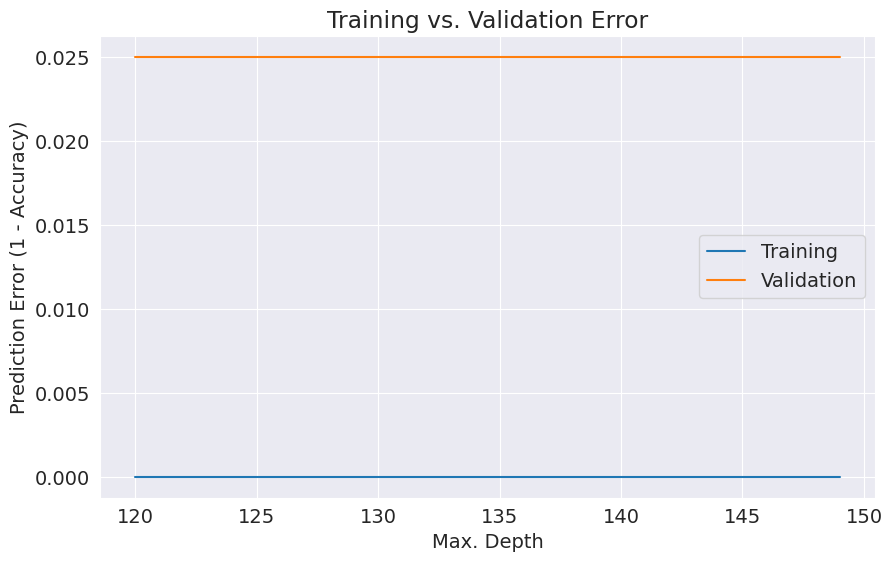

In [86]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
# plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

From the graph we can see there is no huge gain by changing the max_depth

## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model.

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":


A random forest works by averaging/combining the results of several decision trees:



We'll use the `RandomForestClassifier` class from `sklearn.ensemble`.

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs` allows the random forest to use mutiple parallel workers to train decision trees, and `random_state=42` ensures that the we get the same results for each execution.

In [89]:
%%time
model.fit(X_train, train_targets)

CPU times: user 599 ms, sys: 23.7 ms, total: 622 ms
Wall time: 410 ms


RandomForestClassifier(n_jobs=-1, random_state=42)

In [90]:
model.score(X_train, train_targets)

1.0

In [91]:
model.score(X_val, val_targets)

0.9931818181818182

Here we get better accuracy tha the decesion tree using random forest.Let's check whether we caimprove this futher or not

In [148]:
train_probs = model.predict_proba(X_train)
train_probs

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

We can can access individual decision trees using `model.estimators_`

In [93]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [95]:
len(model.estimators_)

100

Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [96]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [97]:
importance_df.head(10)

,feature,importance
4,humidity,0.146390
2,K,0.144924
6,rainfall,0.144111
9,Log_Rainfall,0.143381
1,P,0.106950
7,Total_Nutrients,0.100722
8,Temperature_Humidity,0.074221
0,N,0.071217
3,temperature,0.038934
5,ph,0.029150


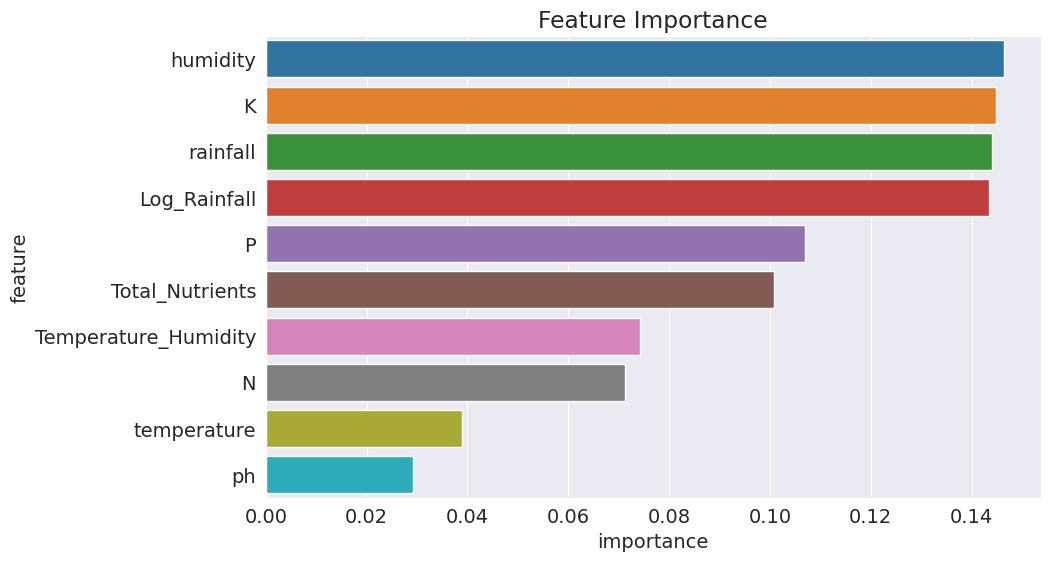

In [98]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Notice that the distribution is a lot less skewed than that for a single decision tree.

Let's save our work before continuing.

## Hyperparameter Tuning with Random Forests

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees.

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [149]:
?RandomForestClassifier

Let's create a base model with which we can compare models with tuned hyperparameters.

In [99]:
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(X_train, train_targets)

In [100]:
base_train_acc = base_model.score(X_train, train_targets)
base_val_acc = base_model.score(X_val, val_targets)

In [101]:
base_accs = base_train_acc, base_val_acc
base_accs

(1.0, 0.9931818181818182)

We can use this as a benchmark for hyperparmeter tuning.

### `n_estimators`

This argument controls the number of decision trees in the random forest. The default value is 100. For larger datasets, it helps to have a greater number of estimators. As a general rule, try to have as few estimators as needed.


**10 estimators**

In [102]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=10)

In [103]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=42)

In [104]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(1.0, 0.9931818181818182)

In [105]:
base_accs

(1.0, 0.9931818181818182)

**500 estimators**

In [106]:
model = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500)
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [107]:
model.score(X_train, train_targets)

1.0

In [108]:
model.score(X_val, val_targets)

0.9954545454545455

In [109]:
base_accs

(1.0, 0.9931818181818182)

### `max_depth` and `max_leaf_nodes`

These arguments are passed directly to each decision tree, and control the maximum depth and max. no leaf nodes of each tree respectively. By default, no maximum depth is specified, which is why each tree has a training accuracy of 100%. You can specify a `max_depth` to reduce overfitting.




Let's define a helper function `test_params` to make it easy to test hyperparameters.

In [110]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(X_train, train_targets)
    return model.score(X_train, train_targets), model.score(X_val, val_targets)

Let's test a few values of `max_depth` and `max_leaf_nodes`.

In [150]:
test_params(max_depth=5)

(0.9537878787878787, 0.925)

In [151]:
test_params(max_depth=26)

(1.0, 0.9931818181818182)

In [152]:
test_params(max_leaf_nodes=2**5)

(0.9931818181818182, 0.990909090909091)

In [153]:
test_params(max_leaf_nodes=2**20)

(1.0, 0.9954545454545455)

In [115]:
base_accs # no max depth or max leaf nodes

(1.0, 0.9931818181818182)

The optimal values of `max_depth` and `max_leaf_nodes` lies somewhere between 0 and unbounded.

### `max_features`

Instead of picking all features (columns) for every split, we can specify that only a fraction of features be chosen randomly to figure out a split.


Notice that the default value `auto` causes only $\sqrt{n}$ out of total features ( $n$ ) to be chosen randomly at each split. This is the reason each decision tree in the forest is different. While it may seem counterintuitive, choosing all features for every split of every tree will lead to identical trees, so the random forest will not generalize well.

In [154]:
test_params(max_features='log2')

(1.0, 0.9931818181818182)

In [117]:
test_params(max_features=3)

(1.0, 0.9931818181818182)

In [118]:
test_params(max_features=6)

(1.0, 0.990909090909091)

In [119]:
base_accs

(1.0, 0.9931818181818182)

### `min_impurity_decrease`

This argument is used to control the threshold for splitting nodes. A node will be split if this split induces a decrease of the impurity (Gini index) greater than or equal to this value. It's default value is 0, and you can increase it to reduce overfitting.



In [155]:
test_params(min_impurity_decrease=1e-7)

(1.0, 0.9931818181818182)

In [156]:
test_params(min_impurity_decrease=1e-2)

(0.9878787878787879, 0.9886363636363636)

In [157]:
base_accs

(1.0, 0.9931818181818182)

### Putting it together

Let's train a random forest with customized hyperparameters based on our learnings. Of course, different hyperpraams

In [166]:
model = RandomForestClassifier(n_jobs=-1,
                               random_state=42,
                               n_estimators=500)

In [168]:
model.fit(X_train, train_targets)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

In [169]:
model.score(X_train, train_targets), model.score(X_val, val_targets)

(1.0, 0.9954545454545455)

In [170]:
base_accs

(1.0, 0.9931818181818182)

We've increased the accuracy from 84.5% with a single decision tree to 85.7% with a well-tuned random forest. Depending on the dataset and the kind of problem, you may or may not a see a significant improvement with hyperparameter tuning.

This could be due to any of the following reasons:

- We may not have found the right mix of hyperparameters to regularize (reduce overfitting) the model properly, and we should keep trying to improve the model.

- We may have reached the limits of the modeling technique we're currently using (Random Forests), and we should try another modeling technique e.g. gradient boosting.

- We may have reached the limits of what we can predict using the given amount of data, and we may need more data to improve the model.

- We may have reached the limits of how well we can predict whether it will rain tomorrow using the given weather measurements, and we may need more features (columns) to further improve the model. In many cases, we can also generate new features using existing features (this is called feature engineering).

- Whether it will rain tomorrow may be an inherently random or chaotic phenomenon which simply cannot be predicted beyond a certain accuracy any amount of data for any number of weather measurements with any modeling technique.  

Remember that ultimately all models are wrong, but some are useful. If you can rely on the model we've created today to make a travel decision for tomorrow, then the model is useful, even though it may sometimes be wrong.

Finally, let's also compute the accuracy of our model on the test set.

In [171]:
model.score(X_test, test_targets)

0.9886363636363636

Notice that the test accuracy is lower

## Making Predictions on New Inputs

Let's define a helper function to make predictions on new inputs.

In [182]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    X_input = input_df[numeric_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [172]:
raw_df

,N,P,K,temperature,humidity,ph,rainfall,Total_Nutrients,Temperature_Humidity,Log_Rainfall,Label,Label_Encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,175,1712.196283,5.317804,wheat,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,184,1748.595734,5.427834,wheat,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,159,1893.744627,5.579595,wheat,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,149,2123.482908,5.496611,wheat,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,162,1642.720357,5.574878,wheat,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,173,1778.191164,5.186125,tomatoes,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,141,1552.805515,4.859228,tomatoes,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,181,1622.263022,5.160909,tomatoes,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,183,1369.512711,4.853399,tomatoes,21


In [183]:
new_input = {'N': 93,
             'P': 42,
             'K': 49,
             'temperature': 26.7,
             'humidity': 87.2,
             'ph': 5.2,
             'rainfall':250,
             'Total_Nutrients': 78,
             'Temperature_Humidity': 1786,
             'Log_Rainfall': 5.89}

In [184]:
predict_input(model, new_input)

(0, 0.492)

## Saving and Loading Trained Models



In [185]:
import joblib

In [188]:
predict_crops = {
    'model': model,
    'imputer': imputer,
    'scaler': scaler,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
}

In [189]:
joblib.dump(predict_crops, 'predict_crops.joblib')

['predict_crops.joblib']

The object can be loaded back using `joblib.load`

In [192]:
predict_crops2 = joblib.load('predict_crops.joblib')

In [193]:
test_preds2 = predict_crops2['model'].predict(X_test)
accuracy_score(test_targets, test_preds2)

0.9886363636363636